In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Understanding

In [3]:
df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns = {
    'credit.policy' : "Credit Policy", 
    'purpose' : "Purpose",
    'int.rate' : "Interest Rate",
    'installment': "Installment",
    'log.annual.inc': "Annual Income",
    'dti': "DTI",
    'fico': "Fico",
    'days.with.cr.line': "Days_CR_Line",
    'revol.bal': "Revolve Balance",
    'revol.util': "Revolve Util",
    'inq.last.6mths': "Inq_6months",
    'delinq.2yrs': "Delinq_2years",
    'pub.rec': "Public Records",
    'not.fully.paid': "Not Fully Paid"
}, inplace = True)

In [8]:
df.columns

Index(['Credit Policy', 'Purpose', 'Interest Rate', 'Installment',
       'Annual Income', 'DTI', 'Fico', 'Days_CR_Line', 'Revolve Balance',
       'Revolve Util', 'Inq_6months', 'Delinq_2years', 'Public Records',
       'Not Fully Paid'],
      dtype='object')

***Credit Policy***

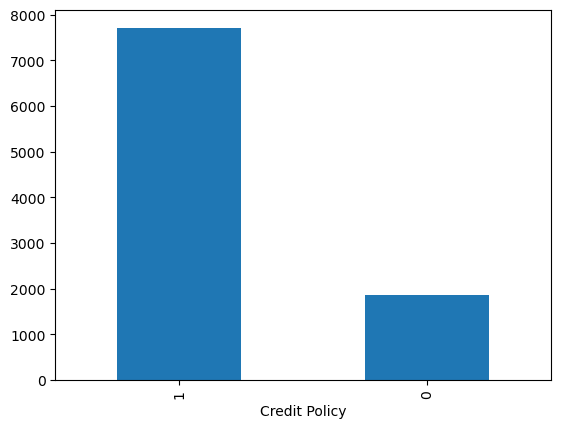

In [9]:
df["Credit Policy"].value_counts().plot(kind = "bar")
plt.show()

***Purpose***

In [10]:
df["Purpose"].value_counts()

Purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

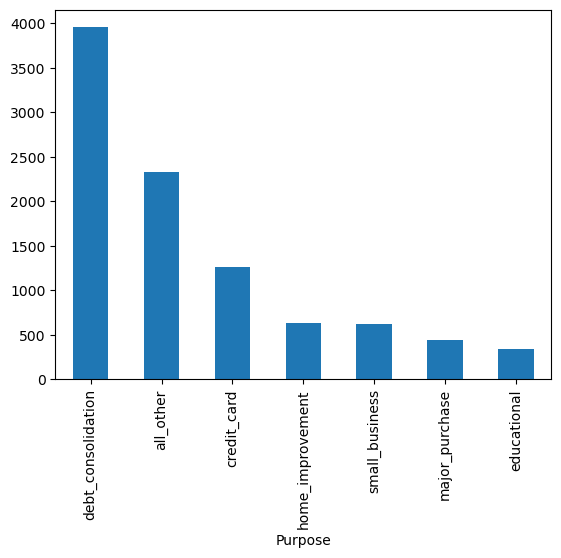

In [11]:
df["Purpose"].value_counts().plot(kind = "bar")
plt.show()

In [12]:
pd.crosstab(df["Credit Policy"], df["Purpose"], margins = True)

Purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,All
Credit Policy,,,,,,,,
0,496,242,734,89,117,66,124,1868
1,1835,1020,3223,254,512,371,495,7710
All,2331,1262,3957,343,629,437,619,9578


***Interest Rate***

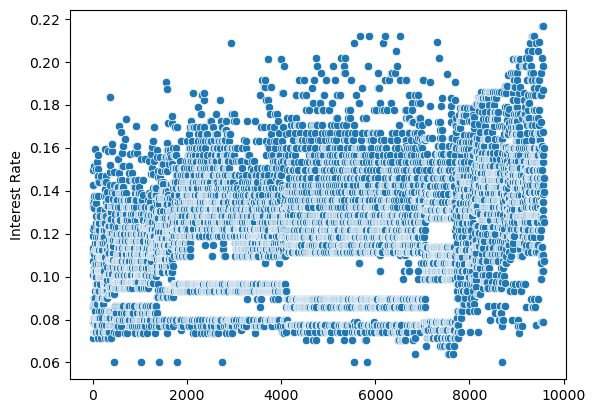

In [13]:
sns.scatterplot(df["Interest Rate"])
plt.show()

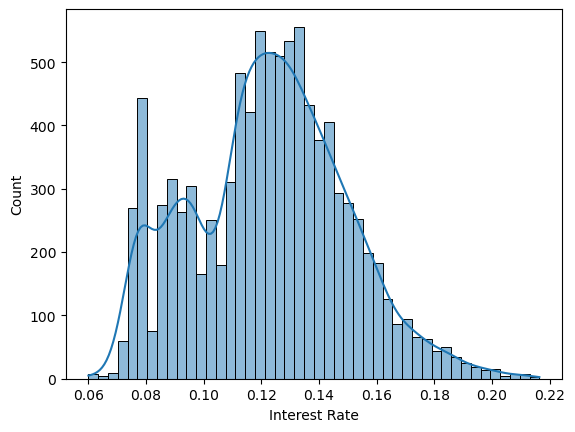

In [14]:
sns.histplot(df["Interest Rate"], kde = True)
plt.show()

In [15]:
df.groupby("Purpose")["Interest Rate"].mean()

Purpose
all_other             0.116771
credit_card           0.119738
debt_consolidation    0.126595
educational           0.119907
home_improvement      0.117507
major_purchase        0.114171
small_business        0.138087
Name: Interest Rate, dtype: float64

***Installment***

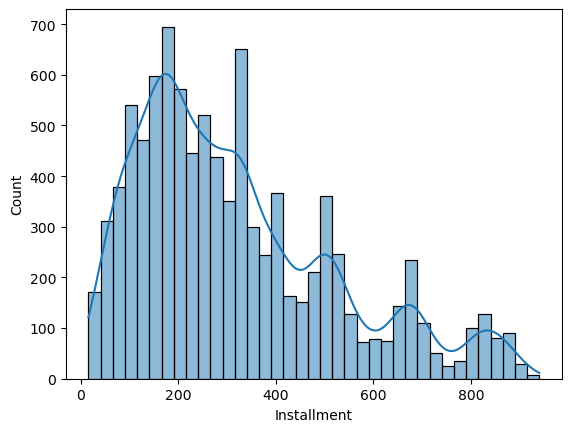

In [16]:
sns.histplot(df["Installment"], kde = True)
plt.show()

In [17]:
df.groupby("Purpose")["Installment"].mean()

Purpose
all_other             244.937542
credit_card           319.500713
debt_consolidation    358.984390
educational           217.547201
home_improvement      337.071590
major_purchase        243.483913
small_business        433.826607
Name: Installment, dtype: float64

***Annual Income***

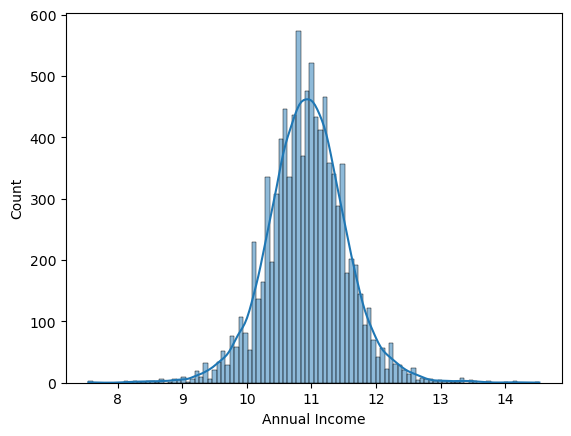

In [18]:
sns.histplot(df["Annual Income"], kde = True)
plt.show()

In [19]:
df.groupby("Purpose")["Annual Income"].mean()

Purpose
all_other             10.845313
credit_card           11.047230
debt_consolidation    10.912909
educational           10.549956
home_improvement      11.201979
major_purchase        10.844895
small_business        11.146216
Name: Annual Income, dtype: float64

***DTI***

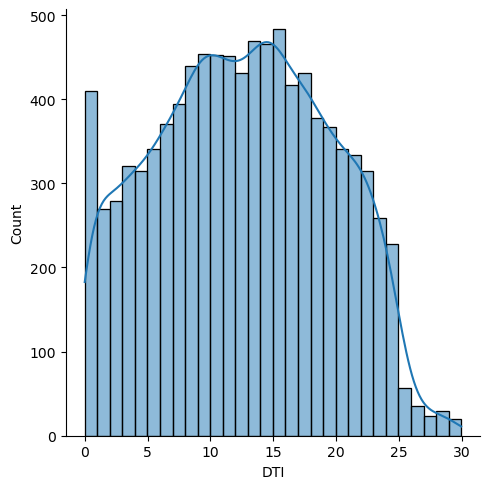

In [20]:
sns.displot(df["DTI"], kde = True)
plt.show()

***Fico***

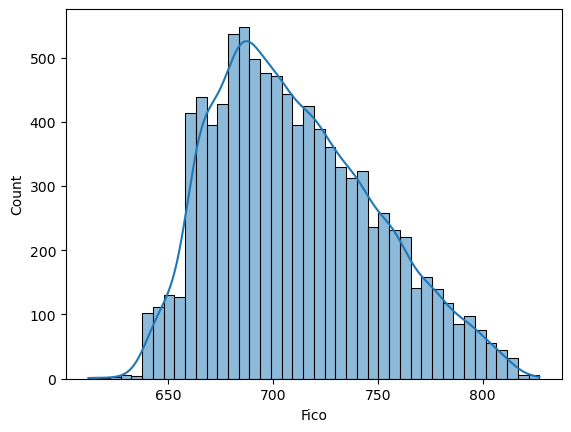

In [21]:
sns.histplot(df["Fico"], kde = True)
plt.show()

In [22]:
df.groupby("Purpose")["Fico"].mean()

Purpose
all_other             715.344058
credit_card           709.626783
debt_consolidation    703.871367
educational           708.282799
home_improvement      724.806041
major_purchase        722.503432
small_business        719.988691
Name: Fico, dtype: float64

***Days_CR_Line***

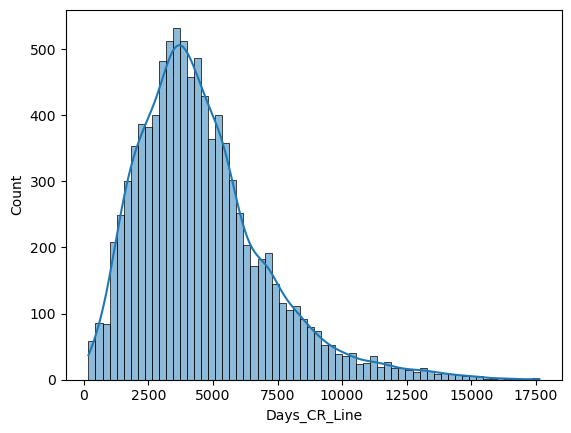

In [23]:
sns.histplot(df["Days_CR_Line"], kde = True)
plt.show()

In [24]:
df.groupby("Purpose")["Days_CR_Line"].mean()

Purpose
all_other             4311.706153
credit_card           4857.005943
debt_consolidation    4533.037139
educational           4008.595724
home_improvement      5201.995562
major_purchase        4325.969108
small_business        4892.115778
Name: Days_CR_Line, dtype: float64

***Revolve Balance***

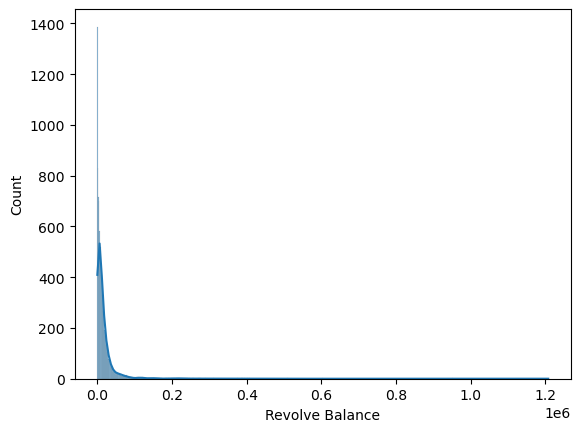

In [25]:
sns.histplot(df["Revolve Balance"], kde = True)
plt.show()

In [26]:
df.groupby("Purpose")["Revolve Balance"].mean()

Purpose
all_other             12883.039897
credit_card           23180.020602
debt_consolidation    17146.710639
educational           10828.897959
home_improvement      17328.756757
major_purchase         7281.453089
small_business        27581.203554
Name: Revolve Balance, dtype: float64

***Revolve Util***

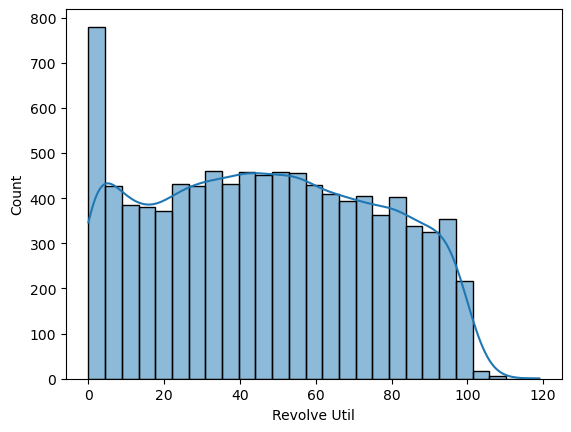

In [27]:
sns.histplot(df["Revolve Util"], kde = True)
plt.show()

***Inq_6months***

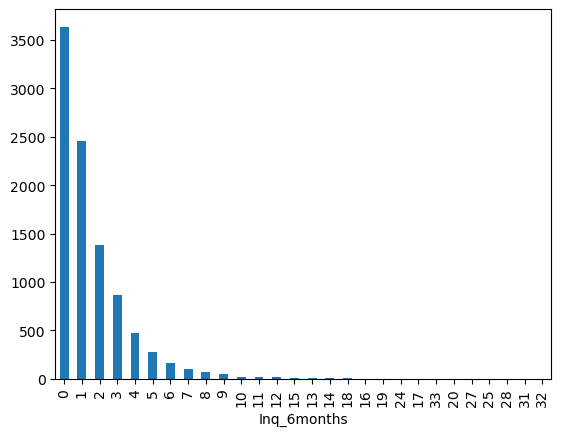

In [28]:
df["Inq_6months"].value_counts().plot(kind = "bar")
plt.show()

In [29]:
# Considering from 5 as 5+
df["Inq_6months"] = df["Inq_6months"].clip(upper = 5)

***Delinq_2years***

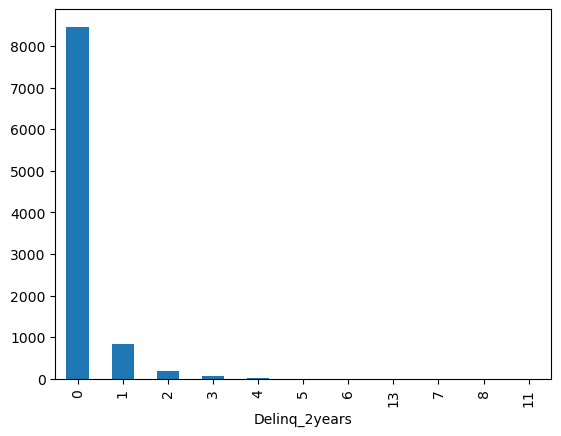

In [30]:
df["Delinq_2years"].value_counts().plot(kind = "bar")
plt.show()

In [31]:
# Considering from 3 as 3+
df["Delinq_2years"] = df["Delinq_2years"].clip(upper = 3)

***Public Records***

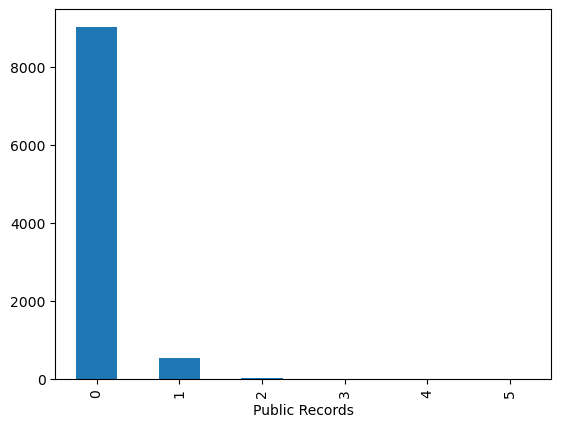

In [32]:
df["Public Records"].value_counts().plot(kind = "bar")
plt.show()

In [33]:
pd.crosstab(df["Credit Policy"], df["Public Records"], margins = True)

Public Records,0,1,2,3,4,5,All
Credit Policy,,,,,,,
0,1716,139,10,2,0,1,1868
1,7303,394,9,3,1,0,7710
All,9019,533,19,5,1,1,9578


In [34]:
df["Public Records"] = df["Public Records"].clip(upper = 1)

***Not Fully Paid***

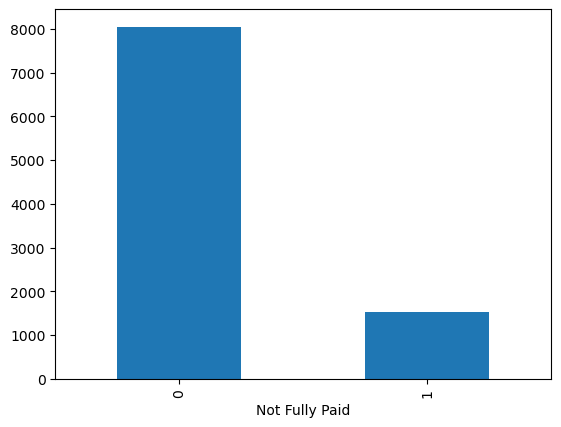

In [35]:
df["Not Fully Paid"].value_counts().plot(kind = "bar")
plt.show()

In [36]:
pd.crosstab(df["Credit Policy"], df["Not Fully Paid"], margins = True)

Not Fully Paid,0,1,All
Credit Policy,,,
0,1349,519,1868
1,6696,1014,7710
All,8045,1533,9578


In [37]:
# Skewness
df.drop("Purpose", axis = 1).skew()

Credit Policy      -1.539621
Interest Rate       0.164420
Installment         0.912522
Annual Income       0.028668
DTI                 0.023941
Fico                0.471260
Days_CR_Line        1.155748
Revolve Balance    11.161058
Revolve Util        0.059985
Inq_6months         1.012418
Delinq_2years       3.605599
Public Records      3.768368
Not Fully Paid      1.854592
dtype: float64

In [38]:
df.describe()

,Credit Policy,Interest Rate,Installment,Annual Income,DTI,Fico,Days_CR_Line,Revolve Balance,Revolve Util,Inq_6months,Delinq_2years,Public Records,Not Fully Paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.409689,0.157027,0.058363,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,1.557783,0.482310,0.234441,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,5.000000,3.000000,1.000000,1.000000


In [39]:
df.describe(include = "object")

,Purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


In [40]:
corr = df.drop("Purpose", axis = 1).corr()

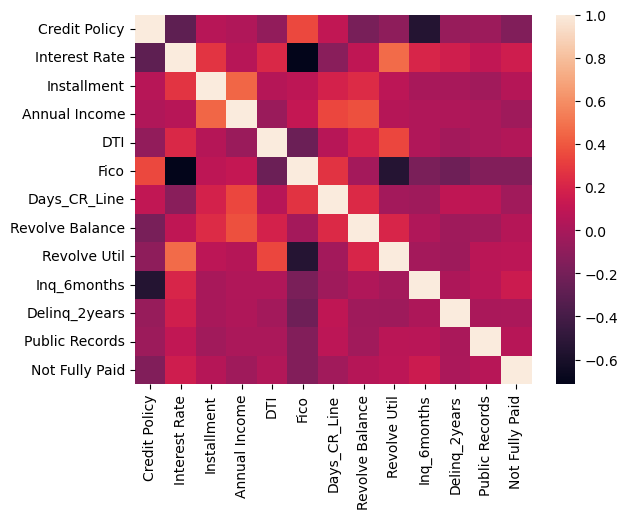

In [41]:
sns.heatmap(corr)
plt.show()

In [42]:
corr

,Credit Policy,Interest Rate,Installment,Annual Income,DTI,Fico,Days_CR_Line,Revolve Balance,Revolve Util,Inq_6months,Delinq_2years,Public Records,Not Fully Paid
Credit Policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.549046,-0.068664,-0.048308,-0.158119
Interest Rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.207727,0.164242,0.097683,0.159552
Installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.003971,-0.002539,-0.031132,0.049955
Annual Income,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.034432,0.028558,0.013952,-0.033439
DTI,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.031116,-0.020783,0.011049,0.037362
Fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.180392,-0.226524,-0.146917,-0.149666
Days_CR_Line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.037792,0.089450,0.079095,-0.029237
Revolve Balance,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.029205,-0.033211,-0.030304,0.053699
Revolve Util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.016536,-0.042963,0.071270,0.082088
Inq_6months,-0.549046,0.207727,-0.003971,0.034432,0.031116,-0.180392,-0.037792,0.029205,-0.016536,1.000000,0.021934,0.064325,0.148974


# Data Preprocessing

***Data Cleaning***

In [43]:
df.isna().sum()

Credit Policy      0
Purpose            0
Interest Rate      0
Installment        0
Annual Income      0
DTI                0
Fico               0
Days_CR_Line       0
Revolve Balance    0
Revolve Util       0
Inq_6months        0
Delinq_2years      0
Public Records     0
Not Fully Paid     0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
# Outliers

detect = ['Interest Rate', 'Installment','Annual Income', 'DTI', 'Fico', 'Days_CR_Line', 'Revolve Balance','Revolve Util']

def outliers (data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_limit = data.quantile(0.25) - (iqr * 1.5)
    upper_limit = data.quantile(0.75) + (iqr * 1.5)
    outlier = len(data[(data < lower_limit) | (data > upper_limit)])
    return lower_limit, upper_limit, outlier

In [46]:
for i in detect:
    l, m, n = outliers(df[i])
    print(f"""{i} --------------------
    Lower Limit :{l}
    Upper Limit :{m}
    Total number of outliers : {n}""")

Interest Rate --------------------
    Lower Limit :0.04870000000000003
    Upper Limit :0.19589999999999996
    Total number of outliers : 51
Installment --------------------
    Lower Limit :-239.71874999999991
    Upper Limit :836.2512499999999
    Total number of outliers : 236
Annual Income --------------------
    Lower Limit :9.45909442375
    Upper Limit :12.39061201375
    Total number of outliers : 238
DTI --------------------
    Lower Limit :-8.893749999999999
    Upper Limit :34.05625
    Total number of outliers : 0
Fico --------------------
    Lower Limit :599.5
    Upper Limit :819.5
    Total number of outliers : 6
Days_CR_Line --------------------
    Lower Limit :-1545.0
    Upper Limit :10095.0
    Total number of outliers : 346
Revolve Balance --------------------
    Lower Limit :-19406.75
    Upper Limit :40843.25
    Total number of outliers : 780
Revolve Util --------------------
    Lower Limit :-49.85
    Upper Limit :143.35000000000002
    Total number of o

These are outliers but we can't consider them as an outlier.

***Feature Engineering***

In [47]:
df["Days_CR_Line"] = df["Days_CR_Line"] ** (1/2)
df["Revolve Balance"] = df["Revolve Balance"] ** (1/4)
df["Inq_6months"] = df["Inq_6months"] ** (1/2)

In [48]:
df.drop("Purpose", axis = 1).skew()

Credit Policy     -1.539621
Interest Rate      0.164420
Installment        0.912522
Annual Income      0.028668
DTI                0.023941
Fico               0.471260
Days_CR_Line       0.274152
Revolve Balance    0.073199
Revolve Util       0.059985
Inq_6months        0.128705
Delinq_2years      3.605599
Public Records     3.768368
Not Fully Paid     1.854592
dtype: float64

***Train-Test-Split***

In [50]:
df.to_csv("Loan_Analyzed.csv", index = False)